In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import r2_score 

In [33]:
# import the dataset
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
# check the null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [37]:
df.shape

(301, 9)

In [38]:
# check the categorical values
print(df["Fuel_Type"].value_counts())

print(df["Seller_Type"].value_counts())

print(df["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [39]:
# encoding the categorical value
df.replace({"Fuel_Type" : {"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2 }} , inplace=True)

df.replace({"Seller_Type" : {"Dealer" : 0 , "Individual" : 1 }} , inplace=True)

df.replace({"Transmission" : {"Manual" : 0 , "Automatic" : 1 }} , inplace=True)

C:\Users\rojas\AppData\Local\Temp\ipykernel_16556\597961208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Fuel_Type" : {"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2 }} , inplace=True)
C:\Users\rojas\AppData\Local\Temp\ipykernel_16556\597961208.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Seller_Type" : {"Dealer" : 0 , "Individual" : 1 }} , inplace=True)
C:\Users\rojas\AppData\Local\Temp\ipykernel_16556\597961208.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

In [40]:
# encoded value
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Split into the data & target

In [41]:
x = df.drop(['Car_Name' , 'Selling_Price'] , axis=1)
y = df['Selling_Price']

Split into the training & testing dataset

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state=42)

# Linear Regression

Selecting the model (LinearRegression)

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(x_train , y_train)

LinearRegression()

In [84]:
# score on training data
print("Training data score is : " , lr.score(x_train , y_train) *100)

# score on test data
print("Testing data score is : " , lr.score(x_test , y_test)*100)

Training data score is :  88.39793496750795
Testing data score is :  84.68053957654695


Prediction on training dataset

In [45]:
y_pred_train = lr.predict(x_train)

In [46]:
# R Squared Error
print("Round Squared Error is : " , r2_score(y_train , y_pred_train)*100)

Round Squared Error is :  88.39793496750795


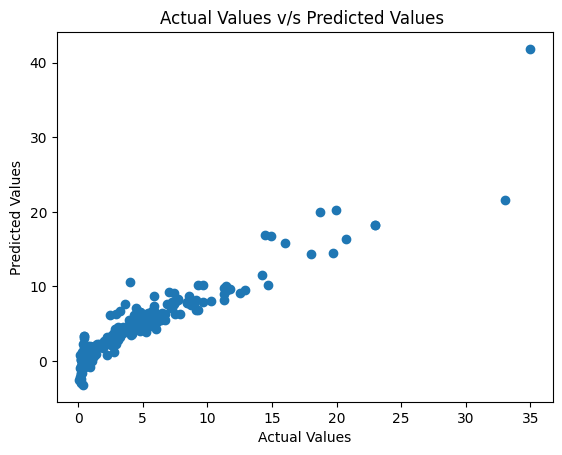

In [47]:
plt.scatter(y_train , y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values v/s Predicted Values ")
plt.show()

Prediction on testing dataset

In [48]:
y_pred_test  = lr.predict(x_test)

In [49]:
# R Squared Error
print("Round Squared Error is : " , r2_score(y_test , y_pred_test) *100)

Round Squared Error is :  84.68053957654695


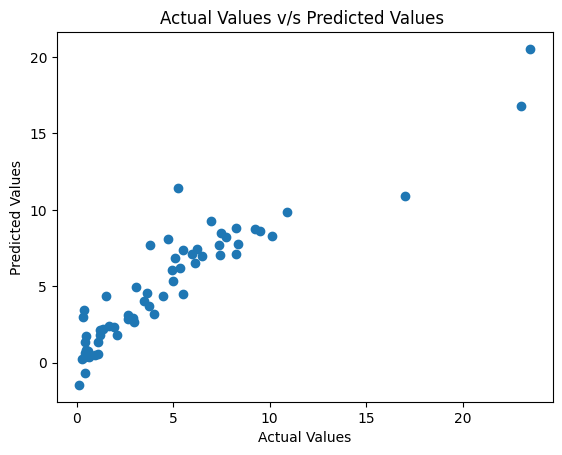

In [50]:
plt.scatter(y_test , y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values v/s Predicted Values ")
plt.show()

# Lasso Regression

In [51]:
lsr = Lasso()

In [52]:
lsr.fit(x_train , y_train)

Lasso()

In [83]:
# score on training data
print("Training data score is : " , lsr.score(x_train , y_train) *100)

# score on test data
print("Testing data score is : " , lsr.score(x_test , y_test)*100)

Training data score is :  84.80302868137167
Testing data score is :  79.85512461284699


In [53]:
# prediction on training dataset 
y_pred_train1 = lsr.predict(x_train)

In [54]:
# R Sqaured Error
print("Round Squared Error is : " , r2_score(y_train , y_pred_train1)*100)

Round Squared Error is :  84.80302868137167


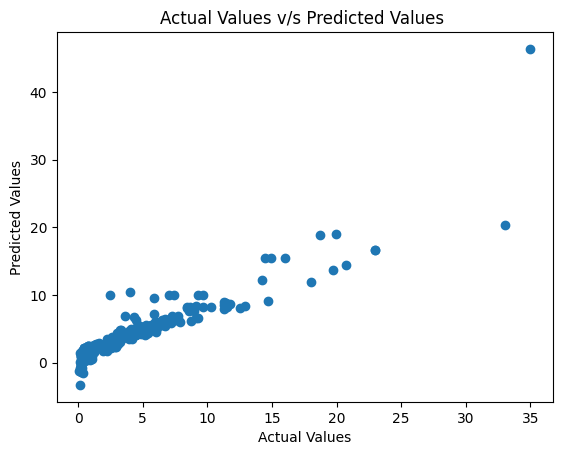

In [55]:
plt.scatter(y_train , y_pred_train1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values v/s Predicted Values ")
plt.show()

In [56]:
# prediction on testing dataset 
y_pred_test1 = lsr.predict(x_test)

In [57]:
# R Sqaured Error
print("Round Squared Error is : " , r2_score(y_test , y_pred_test1)*100)

Round Squared Error is :  79.85512461284699


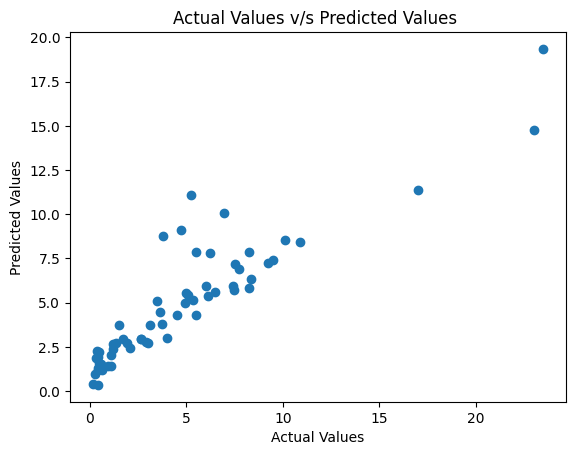

In [58]:
plt.scatter(y_test , y_pred_test1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values v/s Predicted Values ")
plt.show()

# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor , plot_tree

In [77]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [78]:
# score on training data
print("Training data score is : " , dt.score(x_train , y_train) *100)

# score on test data
print("Testing data score is : " , dt.score(x_test , y_test)*100)

Training data score is :  100.0
Testing data score is :  94.33288051705055


# Random Forest 

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor(n_estimators=30)
rf.fit(x_train , y_train)

RandomForestRegressor(n_estimators=30)

In [97]:
# score on training data
print("Training data score is : " , rf.score(x_train , y_train) *100)

# score on test data
print("Testing data score is : " , rf.score(x_test , y_test)*100)

Training data score is :  97.80726265678807
Testing data score is :  96.03118278472655
